# Introduction to Keras

* high-level neural networks API, written in Python and capable of running on top of [TensorFlow](https://github.com/tensorflow/tensorflow), [CNTK](https://github.com/Microsoft/cntk), or [Theano](https://github.com/Theano/Theano)
* Allows easy and fast prototyping
* Runs seamlessly on CPU and GPU
* open source
* Documentation: [https://keras.io/](https://keras.io/)

## installation
First install the backend, for example [TensorFlow](https://www.tensorflow.org/install/).

`$ pip install keras`

## MNIST classification task

The MNIST data set is a database of handwritten digits that is commonly used for training various image processing systems. The goal if this task is to implement a classifier of handwritten digits using neural networks.

![Mnist data set](images/mnist-examples.png)

## Load the data

The data is already shuffled and split to train and test parts.

In [1]:
import pickle

f = open('../data/mnist.pkl', 'rb')
(X_train, y_train), (X_test, y_test) = pickle.load(f)
f.close()

print("X_train original shape: {}".format(X_train.shape))
print("y_train original shape: {}".format(y_train.shape))
print("X_test original shape: {}".format(X_test.shape))
print("y_test original shape: {}".format(y_test.shape))

X_train original shape: (60000, 28, 28)
y_train original shape: (60000,)
X_test original shape: (10000, 28, 28)
y_test original shape: (10000,)


Look at one random example.

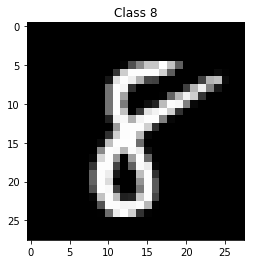

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
i=3495

#print(X_train[i])
plt.imshow(X_train[i], cmap='gray')
plt.title("Class {}".format(y_train[i]))
plt.show()

## Transform the data

We need to scale the input values to have the range (0,1).

In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector.

In [4]:
X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)
print("X_train matrix shape: {}".format(X_train_flat.shape))
print("X_test matrix shape: {}".format(X_test_flat.shape))

X_train matrix shape: (60000, 784)
X_test matrix shape: (10000, 784)


Transform the targets into one-hot encoding, i.e.
```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
```
etc.

In [5]:
from keras.utils import np_utils

n_classes = 10

print(y_train[49])

y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

print(y_train[49])

Using TensorFlow backend.


3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Architecture of one-layer classifier for MNIST

![Mnist data set](images/one-layer-nn.png)

## Architecture definition

Create a sequential model

In [6]:
from keras.models import Sequential

model = Sequential()

Define its structure.

In [7]:
from keras.layers import Dense, Activation

model.add(Dense(64, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

Compile the model

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train the model

In [9]:
model.fit(X_train_flat, y_train,
          batch_size = 128, epochs = 5, verbose=1,
          validation_data=(X_test_flat, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.4226 - acc: 0.8849 - val_loss: 0.2392 - val_acc: 0.9294
Epoch 2/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.2096 - acc: 0.9401 - val_loss: 0.1775 - val_acc: 0.9464
Epoch 3/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.1572 - acc: 0.9552 - val_loss: 0.1443 - val_acc: 0.9559
Epoch 4/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.1253 - acc: 0.9641 - val_loss: 0.1264 - val_acc: 0.9619
Epoch 5/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.1051 - acc: 0.9699 - val_loss: 0.1128 - val_acc: 0.9654


## Evaluate the model

First we need to convert probability vectors to class indices.

In [10]:
y_pred = model.predict(X_test_flat)

print(y_pred.shape)

(10000, 10)


In [11]:
import numpy as np

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred_class.shape)

(10000,)


We can use the scikit-learn functions now.

In [12]:
from sklearn import metrics
from sklearn.metrics import accuracy_score


print ("Test accuracy: {:.4f}".format(accuracy_score(y_test_class, y_pred_class)))
print ()
print(metrics.classification_report(y_test_class, y_pred_class, digits=4))

Test accuracy: 0.9654

             precision    recall  f1-score   support

          0     0.9766    0.9816    0.9791       980
          1     0.9799    0.9877    0.9838      1135
          2     0.9726    0.9641    0.9684      1032
          3     0.9567    0.9624    0.9595      1010
          4     0.9625    0.9664    0.9644       982
          5     0.9683    0.9574    0.9628       892
          6     0.9457    0.9812    0.9631       958
          7     0.9697    0.9660    0.9678      1028
          8     0.9681    0.9343    0.9509       974
          9     0.9523    0.9495    0.9509      1009

avg / total     0.9655    0.9654    0.9654     10000



In [13]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_class, y_pred_class))

[[ 962    0    1    1    0    4    9    1    1    1]
 [   0 1121    4    0    0    1    5    1    3    0]
 [   5    3  995    5    3    1    4    7    7    2]
 [   0    1    6  972    0    7    1   10    9    4]
 [   1    0    3    0  949    0   13    1    2   13]
 [   5    1    0   11    2  854   10    1    5    3]
 [   5    3    1    0    4    4  940    0    1    0]
 [   0    7    8    2    0    1    0  993    1   16]
 [   4    2    4   14    7    9   11    4  910    9]
 [   3    6    1   11   21    1    1    6    1  958]]


In [14]:
y_pred = model.predict(X_train_flat)
y_pred_class = np.argmax(y_pred, axis=1)
y_train_class = np.argmax(y_train, axis=1)

print ("Train accuracy: {:.4f}".format(accuracy_score(y_train_class, y_pred_class)))
print ()
print(metrics.classification_report(y_train_class, y_pred_class, digits=4))

Train accuracy: 0.9740

             precision    recall  f1-score   support

          0     0.9875    0.9868    0.9872      5923
          1     0.9731    0.9920    0.9824      6742
          2     0.9822    0.9730    0.9776      5958
          3     0.9758    0.9605    0.9681      6131
          4     0.9722    0.9750    0.9736      5842
          5     0.9759    0.9646    0.9702      5421
          6     0.9636    0.9941    0.9786      5918
          7     0.9832    0.9730    0.9781      6265
          8     0.9720    0.9501    0.9609      5851
          9     0.9549    0.9679    0.9613      5949

avg / total     0.9741    0.9740    0.9740     60000



# Convolutional neural network for MNIST classification

## Reshape the input data

In [15]:
X_train3d = X_train.reshape(60000, 28, 28, 1)
X_test3d = X_test.reshape(10000, 28, 28, 1)

## Architecture definition

Create a sequential model and define its structure.

In [16]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(16, kernel_size=(5, 5), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(32))
model.add(Flatten())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

Compile the model.

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train the model

In [18]:
model.fit(X_train3d, y_train,
          batch_size = 128, epochs = 5, verbose=1,
          validation_data=(X_test3d, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 24s 402us/step - loss: 0.3387 - acc: 0.9030 - val_loss: 0.1065 - val_acc: 0.9684
Epoch 2/5
60000/60000 [==============================] - 39s 650us/step - loss: 0.1124 - acc: 0.9658 - val_loss: 0.0675 - val_acc: 0.9788
Epoch 3/5
60000/60000 [==============================] - 25s 413us/step - loss: 0.0867 - acc: 0.9736 - val_loss: 0.0561 - val_acc: 0.9822
Epoch 4/5
60000/60000 [==============================] - 24s 406us/step - loss: 0.0733 - acc: 0.9779 - val_loss: 0.0487 - val_acc: 0.9840
Epoch 5/5
60000/60000 [==============================] - 22s 372us/step - loss: 0.0633 - acc: 0.9802 - val_loss: 0.0478 - val_acc: 0.9842


## Evaluate the model

In [19]:
y_pred = model.predict(X_test3d)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [20]:
print ("Test accuracy: {:.4f}".format(accuracy_score(y_test_class, y_pred_class)))
print ()
print(metrics.classification_report(y_test_class, y_pred_class, digits=4))

Test accuracy: 0.9842

             precision    recall  f1-score   support

          0     0.9702    0.9969    0.9834       980
          1     0.9852    0.9956    0.9904      1135
          2     0.9798    0.9893    0.9846      1032
          3     0.9891    0.9891    0.9891      1010
          4     0.9819    0.9939    0.9879       982
          5     0.9866    0.9888    0.9877       892
          6     0.9989    0.9802    0.9895       958
          7     0.9758    0.9815    0.9787      1028
          8     0.9854    0.9692    0.9772       974
          9     0.9908    0.9564    0.9733      1009

avg / total     0.9843    0.9842    0.9842     10000



In [21]:
print(confusion_matrix(y_test_class, y_pred_class))

[[ 977    0    0    0    0    1    0    1    1    0]
 [   0 1130    3    0    1    0    0    0    1    0]
 [   2    2 1021    2    1    0    0    3    1    0]
 [   0    0    2  999    0    3    0    4    2    0]
 [   1    1    1    0  976    0    0    0    1    2]
 [   2    0    0    4    0  882    1    0    3    0]
 [  10    3    0    0    2    3  939    0    1    0]
 [   1    4    9    2    0    1    0 1009    1    1]
 [   7    1    5    3    3    1    0    4  944    6]
 [   7    6    1    0   11    3    0   13    3  965]]


In [22]:
y_pred = model.predict(X_train3d)
y_pred_class = np.argmax(y_pred, axis=1)
y_train_class = np.argmax(y_train, axis=1)

print ("Train accuracy: {:.4f}".format(accuracy_score(y_train_class, y_pred_class)))
print ()
print(metrics.classification_report(y_train_class, y_pred_class, digits=4))

Train accuracy: 0.9876

             precision    recall  f1-score   support

          0     0.9870    0.9975    0.9922      5923
          1     0.9878    0.9945    0.9911      6742
          2     0.9848    0.9894    0.9871      5958
          3     0.9929    0.9853    0.9891      6131
          4     0.9847    0.9914    0.9881      5842
          5     0.9907    0.9854    0.9881      5421
          6     0.9941    0.9916    0.9928      5918
          7     0.9779    0.9899    0.9839      6265
          8     0.9882    0.9774    0.9828      5851
          9     0.9889    0.9724    0.9806      5949

avg / total     0.9876    0.9876    0.9876     60000



## Let's look at some incorrectly classified examples

In [23]:
y_pred = model.predict(X_test3d)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

incorrect_indices = np.nonzero(y_pred_class != y_test_class)[0]
print(incorrect_indices)

[ 259  290  320  321  359  445  582  591  619  659  684  717  720  726
  844  947  965 1014 1033 1039 1068 1181 1182 1226 1232 1247 1260 1319
 1393 1414 1429 1500 1530 1554 1581 1681 1709 1717 1878 1901 2035 2043
 2093 2098 2109 2118 2129 2130 2135 2182 2189 2266 2272 2280 2293 2380
 2387 2406 2414 2425 2462 2488 2597 2654 2720 2742 2760 2780 2896 2921
 2927 2939 2953 2979 2995 3005 3030 3060 3073 3206 3289 3330 3422 3503
 3520 3558 3559 3597 3749 3751 3757 3767 3806 3808 3853 3869 3906 3985
 4075 4078 4163 4176 4207 4224 4238 4248 4256 4265 4400 4405 4500 4571
 4575 4639 4740 4761 4807 4814 4823 4860 4874 4956 4978 5288 5887 5888
 5937 5955 5973 5997 6173 6505 6555 6571 6576 6597 6625 6651 6740 6847
 7121 7432 8094 8332 8408 9009 9015 9019 9024 9530 9638 9642 9664 9692
 9698 9729 9770 9905]


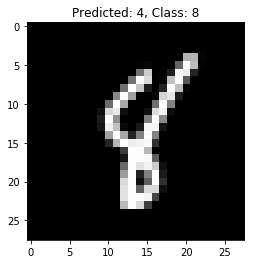

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
i = incorrect_indices[20]

plt.imshow(X_test[i], cmap='gray')
plt.title("Predicted: {}, Class: {}".format(y_pred_class[i], y_test_class[i]))
plt.show()